In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
# from google.colab import files

# # Bilgisayardan dosya yükleme.
# uploaded = files.upload()

In [36]:
dataset = pd.read_csv('final_combined_dataset.csv')

dataset


,Dalc,Fedu,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G1,G2,G3,...,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M,source_mat,source_por,studytime,traveltime
0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,5.0,6.0,6.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0,2.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,5.0,6.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0,1.0
2,2.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,8.0,10.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0,1.0
3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,15.0,14.0,15.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,2.0,1.0
4,0.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0,10.0,10.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1.0,3.0,0.0,0.0,1.0,0.0,0.0,10.0,11.0,10.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0,1,3.0,1.0
1435,1.0,1.0,0.0,0.0,0.0,1.0,0.0,15.0,15.0,16.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0,1,2.0,1.0
1436,1.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,12.0,9.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0,1,2.0,2.0
1437,3.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,10.0,10.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0,1,1.0,2.0


In [37]:

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dalc               1439 non-null   float64
 1   Fedu               1439 non-null   float64
 2   Fjob_at_home       1439 non-null   float64
 3   Fjob_health        1439 non-null   float64
 4   Fjob_other         1439 non-null   float64
 5   Fjob_services      1439 non-null   float64
 6   Fjob_teacher       1439 non-null   float64
 7   G1                 1439 non-null   float64
 8   G2                 1439 non-null   float64
 9   G3                 1439 non-null   float64
 10  Medu               1439 non-null   float64
 11  Mjob_at_home       1439 non-null   float64
 12  Mjob_health        1439 non-null   float64
 13  Mjob_other         1439 non-null   float64
 14  Mjob_services      1439 non-null   float64
 15  Mjob_teacher       1439 non-null   float64
 16  Pstatus_A          1439 

In [38]:
dataset.columns

Index(['Dalc', 'Fedu', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'G1', 'G2', 'G3', 'Medu',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Pstatus_A', 'Pstatus_T', 'Walc', 'absences',
       'activities_no', 'activities_yes', 'address_R', 'address_U', 'age',
       'failures', 'famrel', 'famsize_GT3', 'famsize_LE3', 'famsup_no',
       'famsup_yes', 'freetime', 'goout', 'guardian_father', 'guardian_mother',
       'guardian_other', 'health', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'nursery_no', 'nursery_yes', 'paid_no', 'paid_yes',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'romantic_no', 'romantic_yes', 'school_GP', 'school_MS', 'schoolsup_no',
       'schoolsup_yes', 'sex_F', 'sex_M', 'source_mat', 'source_por',
       'studytime', 'traveltime'],
      dtype='object')

In [39]:

dataset.isna().sum()


,0
Dalc,0
Fedu,0
Fjob_at_home,0
Fjob_health,0
Fjob_other,0
...,...
sex_M,0
source_mat,0
source_por,0
studytime,0


In [40]:

def quanqual(dataset):
    quan = []
    qual = []
    for ColumnName in dataset.columns:
        if dataset[ColumnName].dtype == 'O':
            qual.append(ColumnName)
        else:
            quan.append(ColumnName)
    return quan,qual


In [41]:

quan, qual=quanqual(dataset)


quan


['Dalc',
 'Fedu',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'G1',
 'G2',
 'G3',
 'Medu',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Pstatus_A',
 'Pstatus_T',
 'Walc',
 'absences',
 'activities_no',
 'activities_yes',
 'address_R',
 'address_U',
 'age',
 'failures',
 'famrel',
 'famsize_GT3',
 'famsize_LE3',
 'famsup_no',
 'famsup_yes',
 'freetime',
 'goout',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'health',
 'higher_no',
 'higher_yes',
 'internet_no',
 'internet_yes',
 'nursery_no',
 'nursery_yes',
 'paid_no',
 'paid_yes',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'romantic_no',
 'romantic_yes',
 'school_GP',
 'school_MS',
 'schoolsup_no',
 'schoolsup_yes',
 'sex_F',
 'sex_M',
 'source_mat',
 'source_por',
 'studytime',
 'traveltime']

In [42]:
qual

[]

In [43]:
def Univariate(dataset,quan):
    descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule',
                                      'lesser','greater','min','max','skew','kurtosis'], columns=quan)

    for ColumnName in quan:
        descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
        descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
        descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
        descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
        descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
        descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
        descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
        descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
        descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
        descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
        descriptive.loc['max', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['skew', ColumnName]=dataset[ColumnName].skew()
        descriptive.loc['kurtosis', ColumnName]=dataset[ColumnName].kurtosis()
        descriptive.loc['var', ColumnName]=dataset[ColumnName].var()
        descriptive.loc['std', ColumnName]=dataset[ColumnName].std()

    return descriptive


In [44]:
Univariate(dataset,quan)

,Dalc,Fedu,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G1,G2,G3,...,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M,source_mat,source_por,studytime,traveltime
mean,1.298819,2.42738,0.043085,0.028492,0.557331,0.280056,0.04517,11.126111,11.202032,11.091934,...,0.81098,0.18902,0.917304,0.082696,0.555942,0.444058,0.274496,0.451008,1.676164,1.485754
median,1.0,2.0,0.0,0.0,1.0,0.0,0.0,11.0,11.0,11.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
mode,1.0,2.0,0.0,0.0,1.0,0.0,0.0,10.0,11.0,10.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,2.0,1.0
Q1:25%,1.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,10.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Q2:50%,1.0,2.0,0.0,0.0,1.0,0.0,0.0,11.0,11.0,11.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
Q3:75%,2.0,3.0,0.0,0.0,1.0,1.0,0.0,13.0,13.0,14.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0
Q4:100%,5.0,4.0,1.0,1.0,1.0,1.0,1.0,19.0,19.0,20.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,1,4.0,4.0
IQR,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1.5rule,1.5,1.5,0.0,0.0,1.5,1.5,0.0,6.0,6.0,6.0,...,0.0,0.0,0.0,0.0,1.5,1.5,1.5,1.5,1.5,1.5
lesser,-0.5,0.5,0.0,0.0,-1.5,-1.5,0.0,3.0,3.0,4.0,...,1.0,0.0,1.0,0.0,-1.5,-1.5,-1.5,-1.5,-0.5,-0.5


In [45]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','Relative frequency','cusum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['Relative frequency']=(freqTable['frequency']/103)
    freqTable['cusum']=freqTable['Relative frequency'].cumsum()
    return freqTable


In [46]:
freqTable('G3',dataset)

,unique_values,frequency,Relative frequency,cusum
0,10.000000,209,2.029126,2.029126
1,11.000000,198,1.922330,3.951456
2,13.000000,144,1.398058,5.349515
3,12.000000,134,1.300971,6.650485
4,14.000000,117,1.135922,7.786408
5,15.000000,115,1.116505,8.902913
6,8.000000,99,0.961165,9.864078
7,0.000000,91,0.883495,10.747573
8,9.000000,89,0.864078,11.611650
9,16.000000,68,0.660194,12.271845


In [47]:
target_col = 'G3'
G3_series = dataset[target_col]



In [48]:
mean = G3_series.mean()
median = G3_series.median()
mode = G3_series.mode().iloc[0]  # Get the first mode value
skewness = stats.skew(G3_series)
kurtosis = stats.kurtosis(G3_series)
std_dev = G3_series.std()

print("G3 mean value:", mean)
print("G3 median value:", median)
print("G3 mode value:", mode)
print("G3 skew value:", skewness)
print("G3 kurtosis value:", kurtosis)
print("G3 std deviation value:", std_dev)



G3 mean value: 11.091934237211214
G3 median value: 11.0
G3 mode value: 10.0
G3 skew value: -0.9344500142395847
G3 kurtosis value: 1.294806250834796
G3 std deviation value: 4.09134305842094


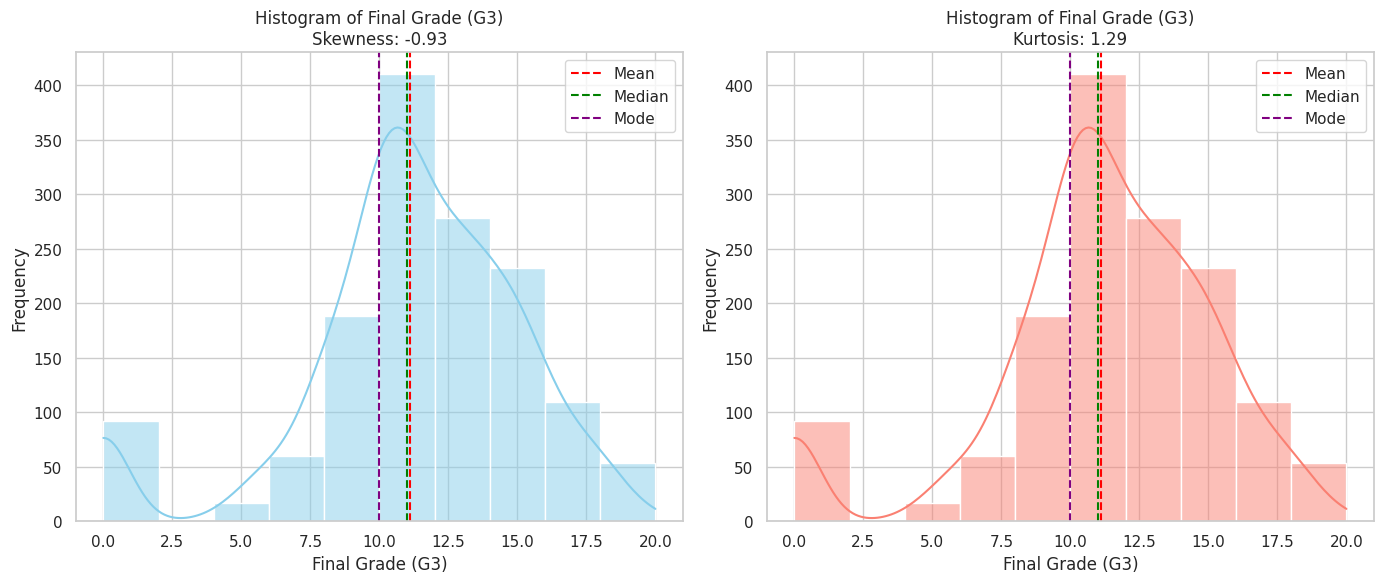

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# الرسم البياني الأول: الانحراف (Skewness)
sns.histplot(G3_series, bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
axes[0].axvline(median, color='green', linestyle='--', label='Median')
axes[0].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[0].set_title(f'Histogram of Final Grade (G3)\nSkewness: {skewness:.2f}')
axes[0].set_xlabel('Final Grade (G3)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# الرسم البياني الثاني: التفرطح (Kurtosis)
sns.histplot(G3_series, bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean, color='red', linestyle='--', label='Mean')
axes[1].axvline(median, color='green', linestyle='--', label='Median')
axes[1].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[1].set_title(f'Histogram of Final Grade (G3)\nKurtosis: {kurtosis:.2f}')
axes[1].set_xlabel('Final Grade (G3)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()




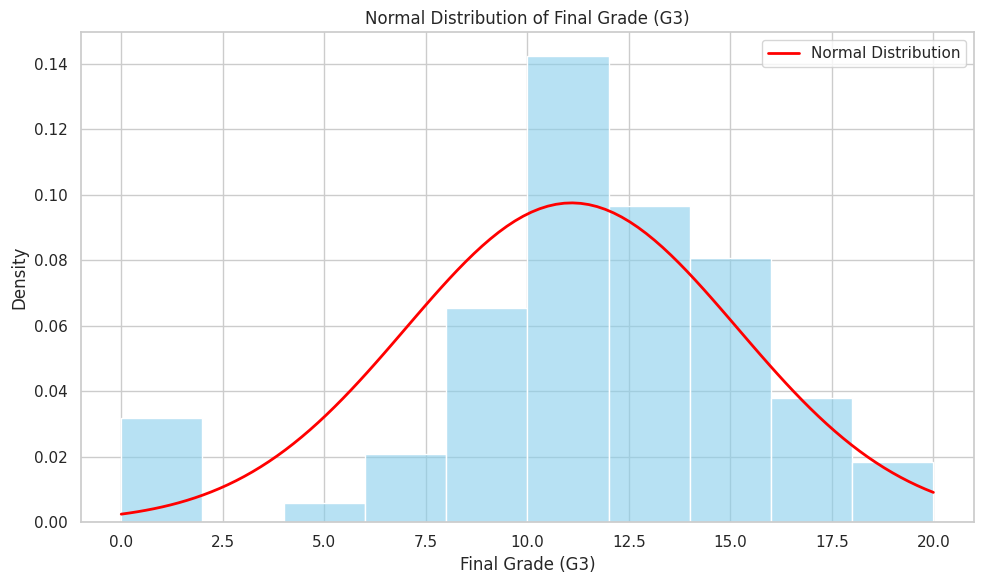

In [50]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(G3_series, bins=10, kde=False, color='skyblue', stat="density", alpha=0.6)

# Generate the x values for the normal distribution curve
x = np.linspace(G3_series.min(), G3_series.max(), 100)
# Calculate the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)

# Add titles and labels
plt.title('Normal Distribution of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


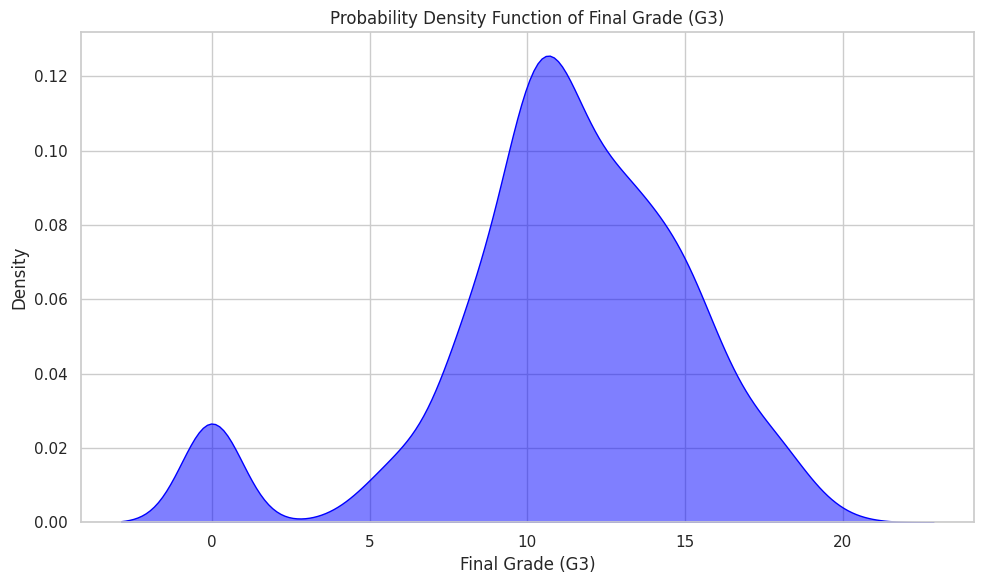

In [51]:
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function
sns.kdeplot(G3_series, color='blue', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Probability Density Function of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


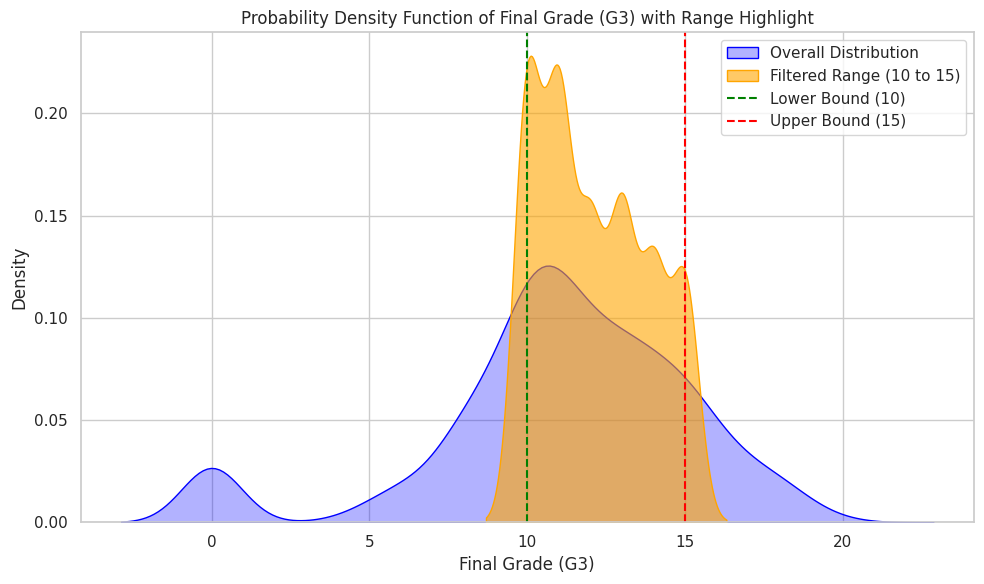

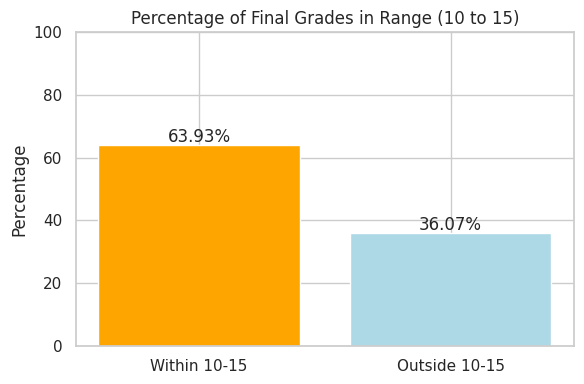

In [52]:
# Define the range for filtering
lower_bound = 10
upper_bound = 15

# Calculate the percentage of values within the specified range
filtered_data = G3_series [(G3_series  >= lower_bound) & (G3_series  <= upper_bound)]
percentage_in_range = (len(filtered_data) / len(G3_series )) * 100

sns.set(style="whitegrid")

# Create the figure for KDE
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function in the specified range
sns.kdeplot(G3_series , color='blue', fill=True, alpha=0.3, label='Overall Distribution')
sns.kdeplot(filtered_data, color='orange', fill=True, alpha=0.6, label='Filtered Range (10 to 15)')

# Add vertical lines for the range
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (10)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (15)')

# Add titles and labels
plt.title('Probability Density Function of Final Grade (G3) with Range Highlight')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Create a bar plot for percentage representation
plt.figure(figsize=(6, 4))
plt.bar(['Within 10-15', 'Outside 10-15'], [percentage_in_range, 100 - percentage_in_range], color=['orange', 'lightblue'])
plt.title(f'Percentage of Final Grades in Range ({lower_bound} to {upper_bound})')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Show the percentage value on top of the bars
for index, value in enumerate([percentage_in_range, 100 - percentage_in_range]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the bar plot
plt.tight_layout()
plt.show()


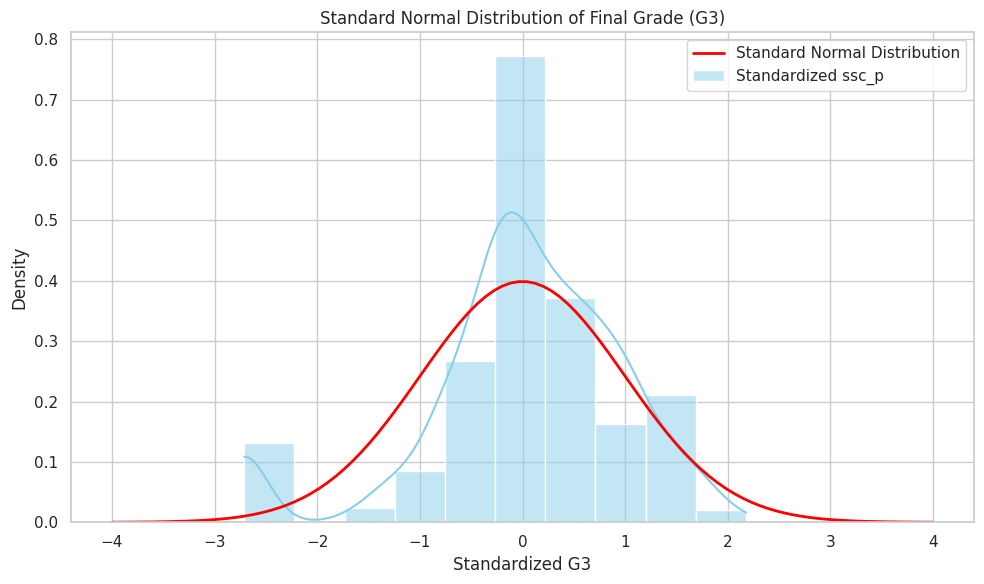

In [53]:



mean = np.mean(G3_series )
std_dev = np.std(G3_series )

# Standardize the ssc_p ratings
standardized_data = (G3_series  - mean) / std_dev

# Create a range of values for plotting the standard normal distribution
x_values = np.linspace(-4, 4, 100)  # Range for the standard normal distribution
y_values = norm.pdf(x_values, 0, 1)  # PDF for standard normal distribution

# Set the style for the plots
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the standardized data's histogram
sns.histplot(standardized_data, bins=10, kde=True, color='skyblue', stat='density', label='Standardized ssc_p')

# Plot the standard normal distribution curve
plt.plot(x_values, y_values, color='red', label='Standard Normal Distribution', lw=2)

# Add titles and labels
plt.title('Standard Normal Distribution of Final Grade (G3)')
plt.xlabel('Standardized G3')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
dataset.cov(numeric_only=True)

,Dalc,Fedu,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G1,G2,G3,...,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M,source_mat,source_por,studytime,traveltime
Dalc,1.149866,-0.017228,0.003806,0.003302,-0.032443,0.044907,0.006660,-0.346619,-0.384859,-0.323736,...,-0.056134,0.056134,-0.010738,0.010738,-0.135643,0.135643,0.050046,0.091841,0.017559,0.077278
Fedu,-0.017228,1.197609,-0.017731,0.030235,-0.127092,0.010964,0.065522,0.642171,0.662050,0.676355,...,0.073190,-0.073190,-0.004966,0.004966,-0.035399,0.035399,0.025859,-0.054499,0.004979,-0.138900
Fjob_at_home,0.003806,-0.017731,0.041258,-0.001228,-0.024030,-0.012075,-0.001948,-0.013087,-0.020533,-0.003268,...,-0.012017,0.012017,-0.001998,0.001998,0.005933,-0.005933,0.002073,0.009762,0.013267,-0.004949
Fjob_health,0.003302,0.030235,-0.001228,0.027699,-0.015891,-0.007985,-0.001288,0.018657,0.019274,0.030063,...,0.001912,-0.001912,-0.004596,0.004596,0.002230,-0.002230,0.004691,0.003135,0.021055,-0.008286
Fjob_other,-0.032443,-0.127092,-0.024030,-0.015891,0.246885,-0.156192,-0.025192,-0.120624,-0.094596,-0.068359,...,0.008758,-0.008758,0.003006,-0.003006,0.000094,-0.000094,-0.002188,0.003680,-0.014801,0.034371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sex_M,0.135643,0.035399,-0.005933,-0.002230,-0.000094,0.005594,0.003572,0.020309,0.014343,0.012598,...,0.013758,-0.013758,0.014494,-0.014494,-0.247042,0.247042,0.008065,-0.015434,-0.111313,0.011546
source_mat,0.050046,0.025859,0.002073,0.004691,-0.002188,0.000263,0.007759,-0.059676,-0.134077,-0.185893,...,0.019933,-0.019933,-0.012750,0.012750,-0.008065,0.008065,0.199287,-0.123886,0.098689,-0.010343
source_por,0.091841,-0.054499,0.009762,0.003135,0.003680,-0.000526,0.004648,0.123194,0.166121,0.367409,...,-0.071854,0.071854,-0.009965,0.009965,0.015434,-0.015434,-0.123886,0.247772,0.114861,0.037375
studytime,0.017559,0.004979,0.013267,0.021055,-0.014801,0.001743,0.008379,0.525934,0.453702,0.640950,...,-0.020225,0.020225,-0.037925,0.037925,0.111313,-0.111313,0.098689,0.114861,0.849160,-0.020611


In [55]:
dataset.corr(numeric_only=True)


,Dalc,Fedu,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G1,G2,G3,...,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M,source_mat,source_por,studytime,traveltime
Dalc,1.000000,-0.014681,0.017475,0.018503,-0.060890,0.093232,0.029895,-0.105104,-0.110108,-0.073791,...,-0.133658,0.133658,-0.036344,0.036344,-0.254501,0.254501,0.104547,0.172062,0.017769,0.103037
Fedu,-0.014681,1.000000,-0.079768,0.166001,-0.233730,0.022304,0.288196,0.190803,0.185598,0.151061,...,0.170760,-0.170760,-0.016472,0.016472,-0.065080,0.065080,0.052931,-0.100047,0.004937,-0.181471
Fjob_at_home,0.017475,-0.079768,1.000000,-0.036339,-0.238093,-0.132343,-0.046152,-0.020950,-0.031012,-0.003933,...,-0.151057,0.151057,-0.035698,0.035698,0.058767,-0.058767,0.022864,0.096550,0.070880,-0.034836
Fjob_health,0.018503,0.166001,-0.036339,1.000000,-0.192157,-0.106810,-0.037248,0.036451,0.035529,0.044150,...,0.029336,-0.029336,-0.100235,0.100235,0.026955,-0.026955,0.063138,0.037847,0.137286,-0.071186
Fjob_other,-0.060890,-0.233730,-0.238093,-0.192157,1.000000,-0.699826,-0.244051,-0.078936,-0.058407,-0.033627,...,0.045004,-0.045004,0.021957,-0.021957,0.000380,-0.000380,-0.009863,0.014879,-0.032325,0.098902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sex_M,0.254501,0.065080,-0.058767,-0.026955,-0.000380,0.025057,0.034591,0.013286,0.008853,0.006195,...,0.070674,-0.070674,0.105843,-0.105843,-1.000000,1.000000,0.036346,-0.062383,-0.243034,0.033213
source_mat,0.104547,0.052931,0.022864,0.063138,-0.009863,0.001311,0.083664,-0.043466,-0.092142,-0.101779,...,0.114002,-0.114002,-0.103665,0.103665,-0.036346,0.036346,1.000000,-0.557516,0.239903,-0.033125
source_por,0.172062,-0.100047,0.096550,0.037847,0.014879,-0.002352,0.044951,0.080474,0.102386,0.180409,...,-0.368565,0.368565,-0.072663,0.072663,0.062383,-0.062383,-0.557516,1.000000,0.250409,0.107354
studytime,0.017769,0.004937,0.070880,0.137286,-0.032325,0.004210,0.043769,0.185579,0.151049,0.170006,...,-0.056038,0.056038,-0.149377,0.149377,0.243034,-0.243034,0.239903,0.250409,1.000000,-0.031979


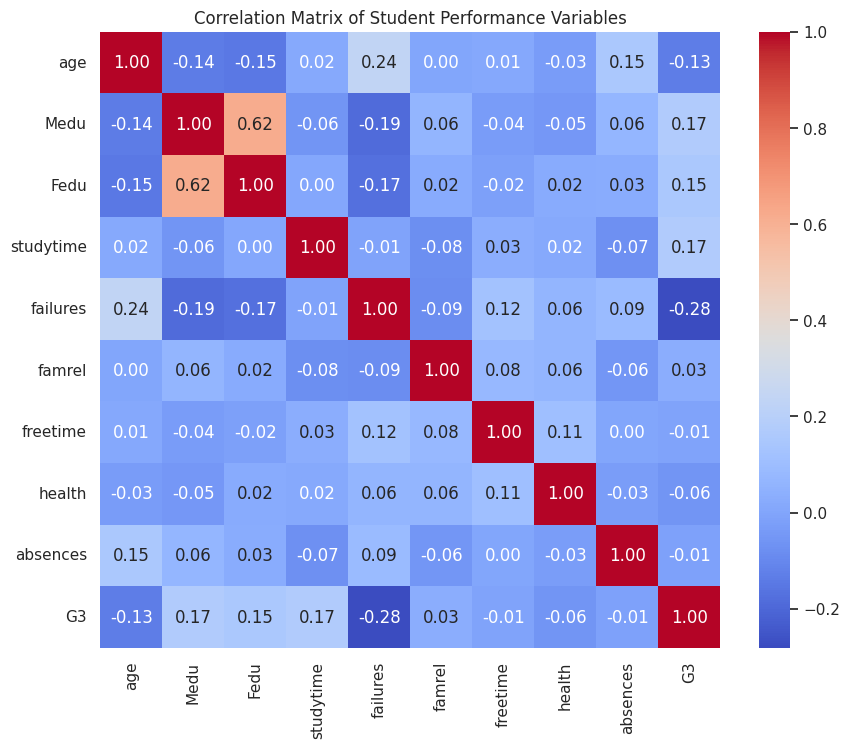

In [56]:
numerical_cols = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
                  'freetime', 'health', 'absences', 'G3']

corr_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Student Performance Variables')
plt.show()


In [57]:
# # Correlation heatmap for numerical columns
# numerical_cols = ['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
#  'freetime', 'health', 'absences', 'address', 'guardian', 'G3']

# corr_matrix = dataset[numerical_cols].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title('Correlation Matrix')
# plt.show()


In [58]:

# # Compute the correlation matrix
# correlation_matrix = dataset[numerical_cols].corr()

# # Identify positive and negative correlations
# positive_correlations = correlation_matrix[correlation_matrix > 0].stack()
# negative_correlations = correlation_matrix[correlation_matrix < 0].stack()

# print("\nPositive Correlations:")
# print(positive_correlations)

# print("\nNegative Correlations:")
# print(negative_correlations)


correlation_matrix = dataset[numerical_cols].corr()

# استخراج العلاقات الموجبة والسالبة
positive_correlations = correlation_matrix[correlation_matrix > 0].stack().sort_values(ascending=False)
negative_correlations = correlation_matrix[correlation_matrix < 0].stack().sort_values()

print("\nPositive Correlations (sorted):")
print(positive_correlations)

print("\nNegative Correlations (sorted):")
print(negative_correlations)



Positive Correlations (sorted):
age        age          1.000000
Medu       Medu         1.000000
studytime  studytime    1.000000
Fedu       Fedu         1.000000
failures   failures     1.000000
absences   absences     1.000000
freetime   freetime     1.000000
G3         G3           1.000000
health     health       1.000000
famrel     famrel       1.000000
Fedu       Medu         0.618989
Medu       Fedu         0.618989
failures   age          0.238091
age        failures     0.238091
G3         Medu         0.173915
Medu       G3           0.173915
studytime  G3           0.170006
G3         studytime    0.170006
absences   age          0.151281
age        absences     0.151281
Fedu       G3           0.151061
G3         Fedu         0.151061
freetime   failures     0.119657
failures   freetime     0.119657
freetime   health       0.106147
health     freetime     0.106147
absences   failures     0.085345
failures   absences     0.085345
famrel     freetime     0.075069
freetime  

In [59]:
# علاقات G3 فقط
g3_corr = correlation_matrix['G3'].drop('G3').sort_values()

print("\nCorrelation of variables with G3:")
print(g3_corr)



Correlation of variables with G3:
failures    -0.281050
age         -0.131952
health      -0.060233
absences    -0.014711
freetime    -0.008631
famrel       0.033418
Fedu         0.151061
studytime    0.170006
Medu         0.173915
Name: G3, dtype: float64


In [60]:

dataset['sex'] = dataset[['sex_F', 'sex_M']].idxmax(axis=1).str[-1]


# تقسيم البيانات
females = dataset[dataset['sex'] == 'F']['G3']
males = dataset[dataset['sex'] == 'M']['G3']

# اختبار T
t_stat, p_value = ttest_ind(females, males, nan_policy='omit')

print("T-Test Between Female and Male Final Grades (G3):")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_value:.4f}")

T-Test Between Female and Male Final Grades (G3):
T-statistic = -0.235
P-value     = 0.8144


In [61]:

young = dataset[dataset['age'] <= 16]['G3']
old = dataset[dataset['age'] > 16]['G3']

t_stat, p_value = ttest_ind(young, old, nan_policy='omit')

print("T-Test Between Age Groups (≤16 vs >16):")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_value:.4f}")


T-Test Between Age Groups (≤16 vs >16):
T-statistic = 3.730
P-value     = 0.0002


In [62]:

# from scipy.stats import ttest_ind

# ckd_bp = dataset[dataset['classification'] == 'ckd']['G3']
# non_ckd_bp = dataset[dataset['classification'] == 'notckd']['G3']
# t_stat, p_value = ttest_ind(ckd_bp, non_ckd_bp, nan_policy='omit')
# print(f"T-statistic: {t_stat}, P-value: {p_value}")


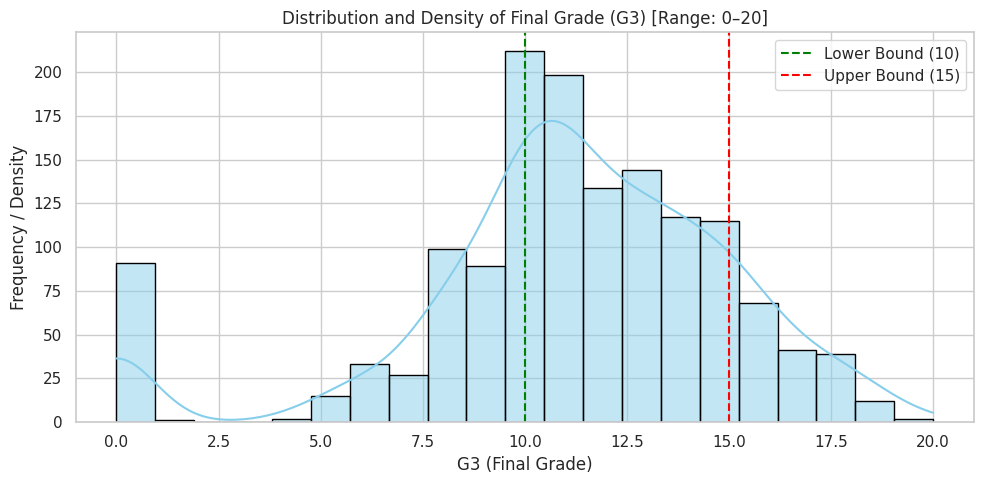

In [63]:

# Corrected Histogram + KDE for G3 [0–20]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_combined_dataset.csv")

# Ensure G3 is numeric
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='G3', bins=21, kde=True, color='skyblue', edgecolor='black')
plt.axvline(10, color='green', linestyle='--', label='Lower Bound (10)')
plt.axvline(15, color='red', linestyle='--', label='Upper Bound (15)')
plt.title("Distribution and Density of Final Grade (G3) [Range: 0–20]")
plt.xlabel("G3 (Final Grade)")
plt.ylabel("Frequency / Density")
plt.legend()
plt.tight_layout()
plt.show()


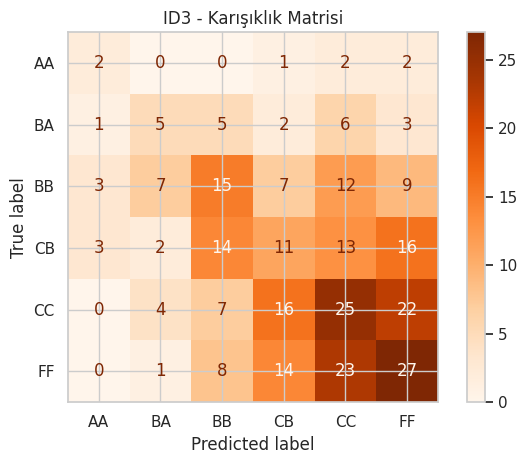

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Özellikler (bağımsız değişkenler)
# Doğrudan var olan sütunlar kullanılır

X = dataset[['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
             'famrel', 'freetime', 'health', 'absences',
             'address_U', 'address_R',
             'guardian_mother', 'guardian_father', 'guardian_other']]



# Eğer G3 hâlâ sayısal ise (örneğin 0–20), önce 100'e çevir ve harf notuna dönüştür
dataset['G3'] = dataset['G3'] * 5

def convert_to_grade(score):
    if score >= 90:
        return 'AA'
    elif score >= 80:
        return 'BA'
    elif score >= 70:
        return 'BB'
    elif score >= 60:
        return 'CB'
    elif score >= 50:
        return 'CC'
    else:
        return 'FF'

dataset['G3'] = dataset['G3'].apply(convert_to_grade)

# Hedef değişken (G3 harf notu)
y = dataset['G3']

# 1. Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. ID3 algoritması ile modeli eğit
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)
clf.fit(X_train, y_train)

# 3. Test verisi üzerinde tahmin yap
y_pred = clf.predict(X_test)

# 4. Karışıklık Matrisi oluştur ve görselleştir
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("ID3 - Karışıklık Matrisi")
plt.tight_layout()
plt.show()